In [ ]:
%cd ..
import datasets.data_module as data_module
from pipeline.image_stitcher import ImageStitcher
from pipeline.enums import *
import notebooks.helpers as helpers

### Configure dataset

In [ ]:
TRAIN_LIST = "./datasets/WalkDepth/train.txt"
VALID_LIST = "./datasets/WalkDepth/valid.txt"
TEST_LIST = "./datasets/WalkDepth/test.txt"

data_root = "./datasets/WalkDepth2"
min_overlap = 0.15

dm = data_module.WalkDepthDataLoader(data_root, TEST_LIST, min_overlap)

### Retrieve sample pair

./datasets/WalkDepth2\0000029\depth_maps/440.png.photometric.bin
./datasets/WalkDepth2\0000029\depth_maps/350.png.photometric.bin


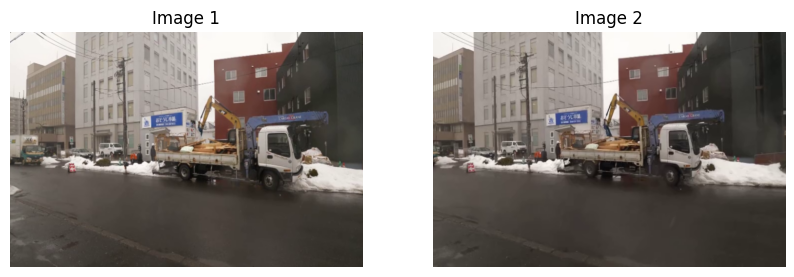

In [63]:
entry = dm.get_random_pair()

img1, img2 = entry["img1"], entry["img2"]

helpers.show_image_pair(img1, img2)

### Configure Image Stitcher

In [52]:
feature_matcher = MatcherType.AdaMatcher
composer_type = ComposerType.UDIS2
weights_path = "./weights/finetuned.ckpt"

image_stitcher = ImageStitcher(feature_matcher, composer_type, weights_path)

### Stitch images

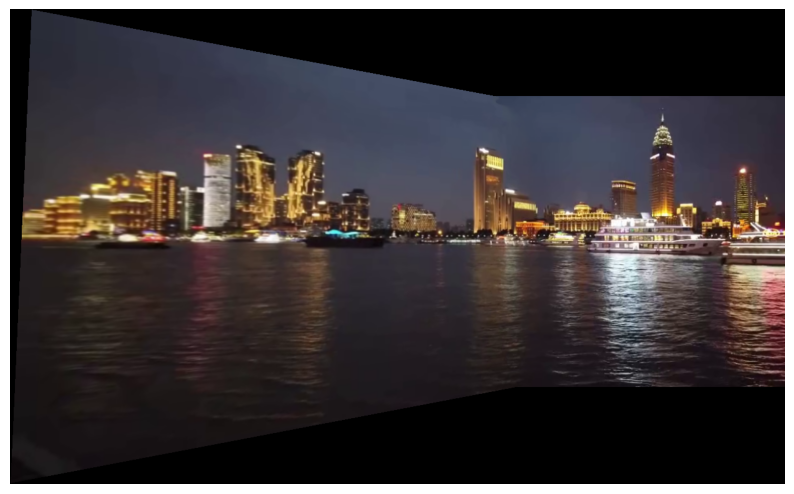

In [53]:
result, _, _ = image_stitcher.stitch(img1, img2)

helpers.show_image(result)